# INF 552 HW3 - Chao Chen

## Question 1

In [48]:
import sys
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.metrics import confusion_matrix, precision_score, f1_score
from sklearn.preprocessing import Imputer
import scipy.stats as stats
import math


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### (a) and (b)

In [49]:
names = np.genfromtxt('names.txt', dtype=str)
df = pd.read_csv('communities.data.txt', header=None, names=names, na_values=["?"])
X = df[df.columns[5:-1]]
y = df[df.columns[-1:]]

In [50]:
from sklearn.preprocessing import Imputer

# imputation
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_imputed = imp.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed)
X_imputed.columns = names[5:-1]

In [51]:
# separate training set and test set
X_train = X_imputed[:1495]
y_train = y[:1495]
X_test = X_imputed[1495:]
y_test = y[1495:]

### (c)

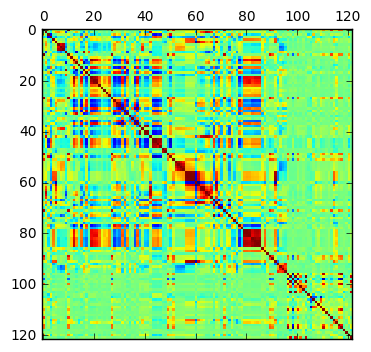

In [52]:
import matplotlib.pyplot as plt
plt.matshow(X_imputed.corr())

### (d)

In [56]:
CV = np.var(X_imputed, axis=0)/np.mean(X_imputed, axis=0)
print(CV)

population              0.279497
householdsize           0.057812
racepctblack            0.357407
racePctWhite            0.078976
racePctAsian            0.283756
racePctHisp             0.375118
agePct12t21             0.056748
agePct12t29             0.041712
agePct16t24             0.082405
agePct65up              0.075837
numbUrban               0.256607
pctUrban                0.284024
medIncome               0.121318
pctWWage                0.059912
pctWFarmSelf            0.142810
pctWInvInc              0.063938
pctWSocSec              0.063949
pctWPubAsst             0.155202
pctWRetire              0.058557
medFamInc               0.104574
perCapInc               0.104223
whitePerCap             0.094765
blackPerCap             0.101098
indianPerCap            0.133349
AsianPerCap             0.118397
OtherPerCap             0.128002
HispPerCap              0.086729
NumUnderPov             0.294752
PctPopUnderPov          0.172179
PctLess9thGrade         0.144073
          

### (e)

The scatter plots only show the relationship between each two features, so we can not draw conclusions about significance.

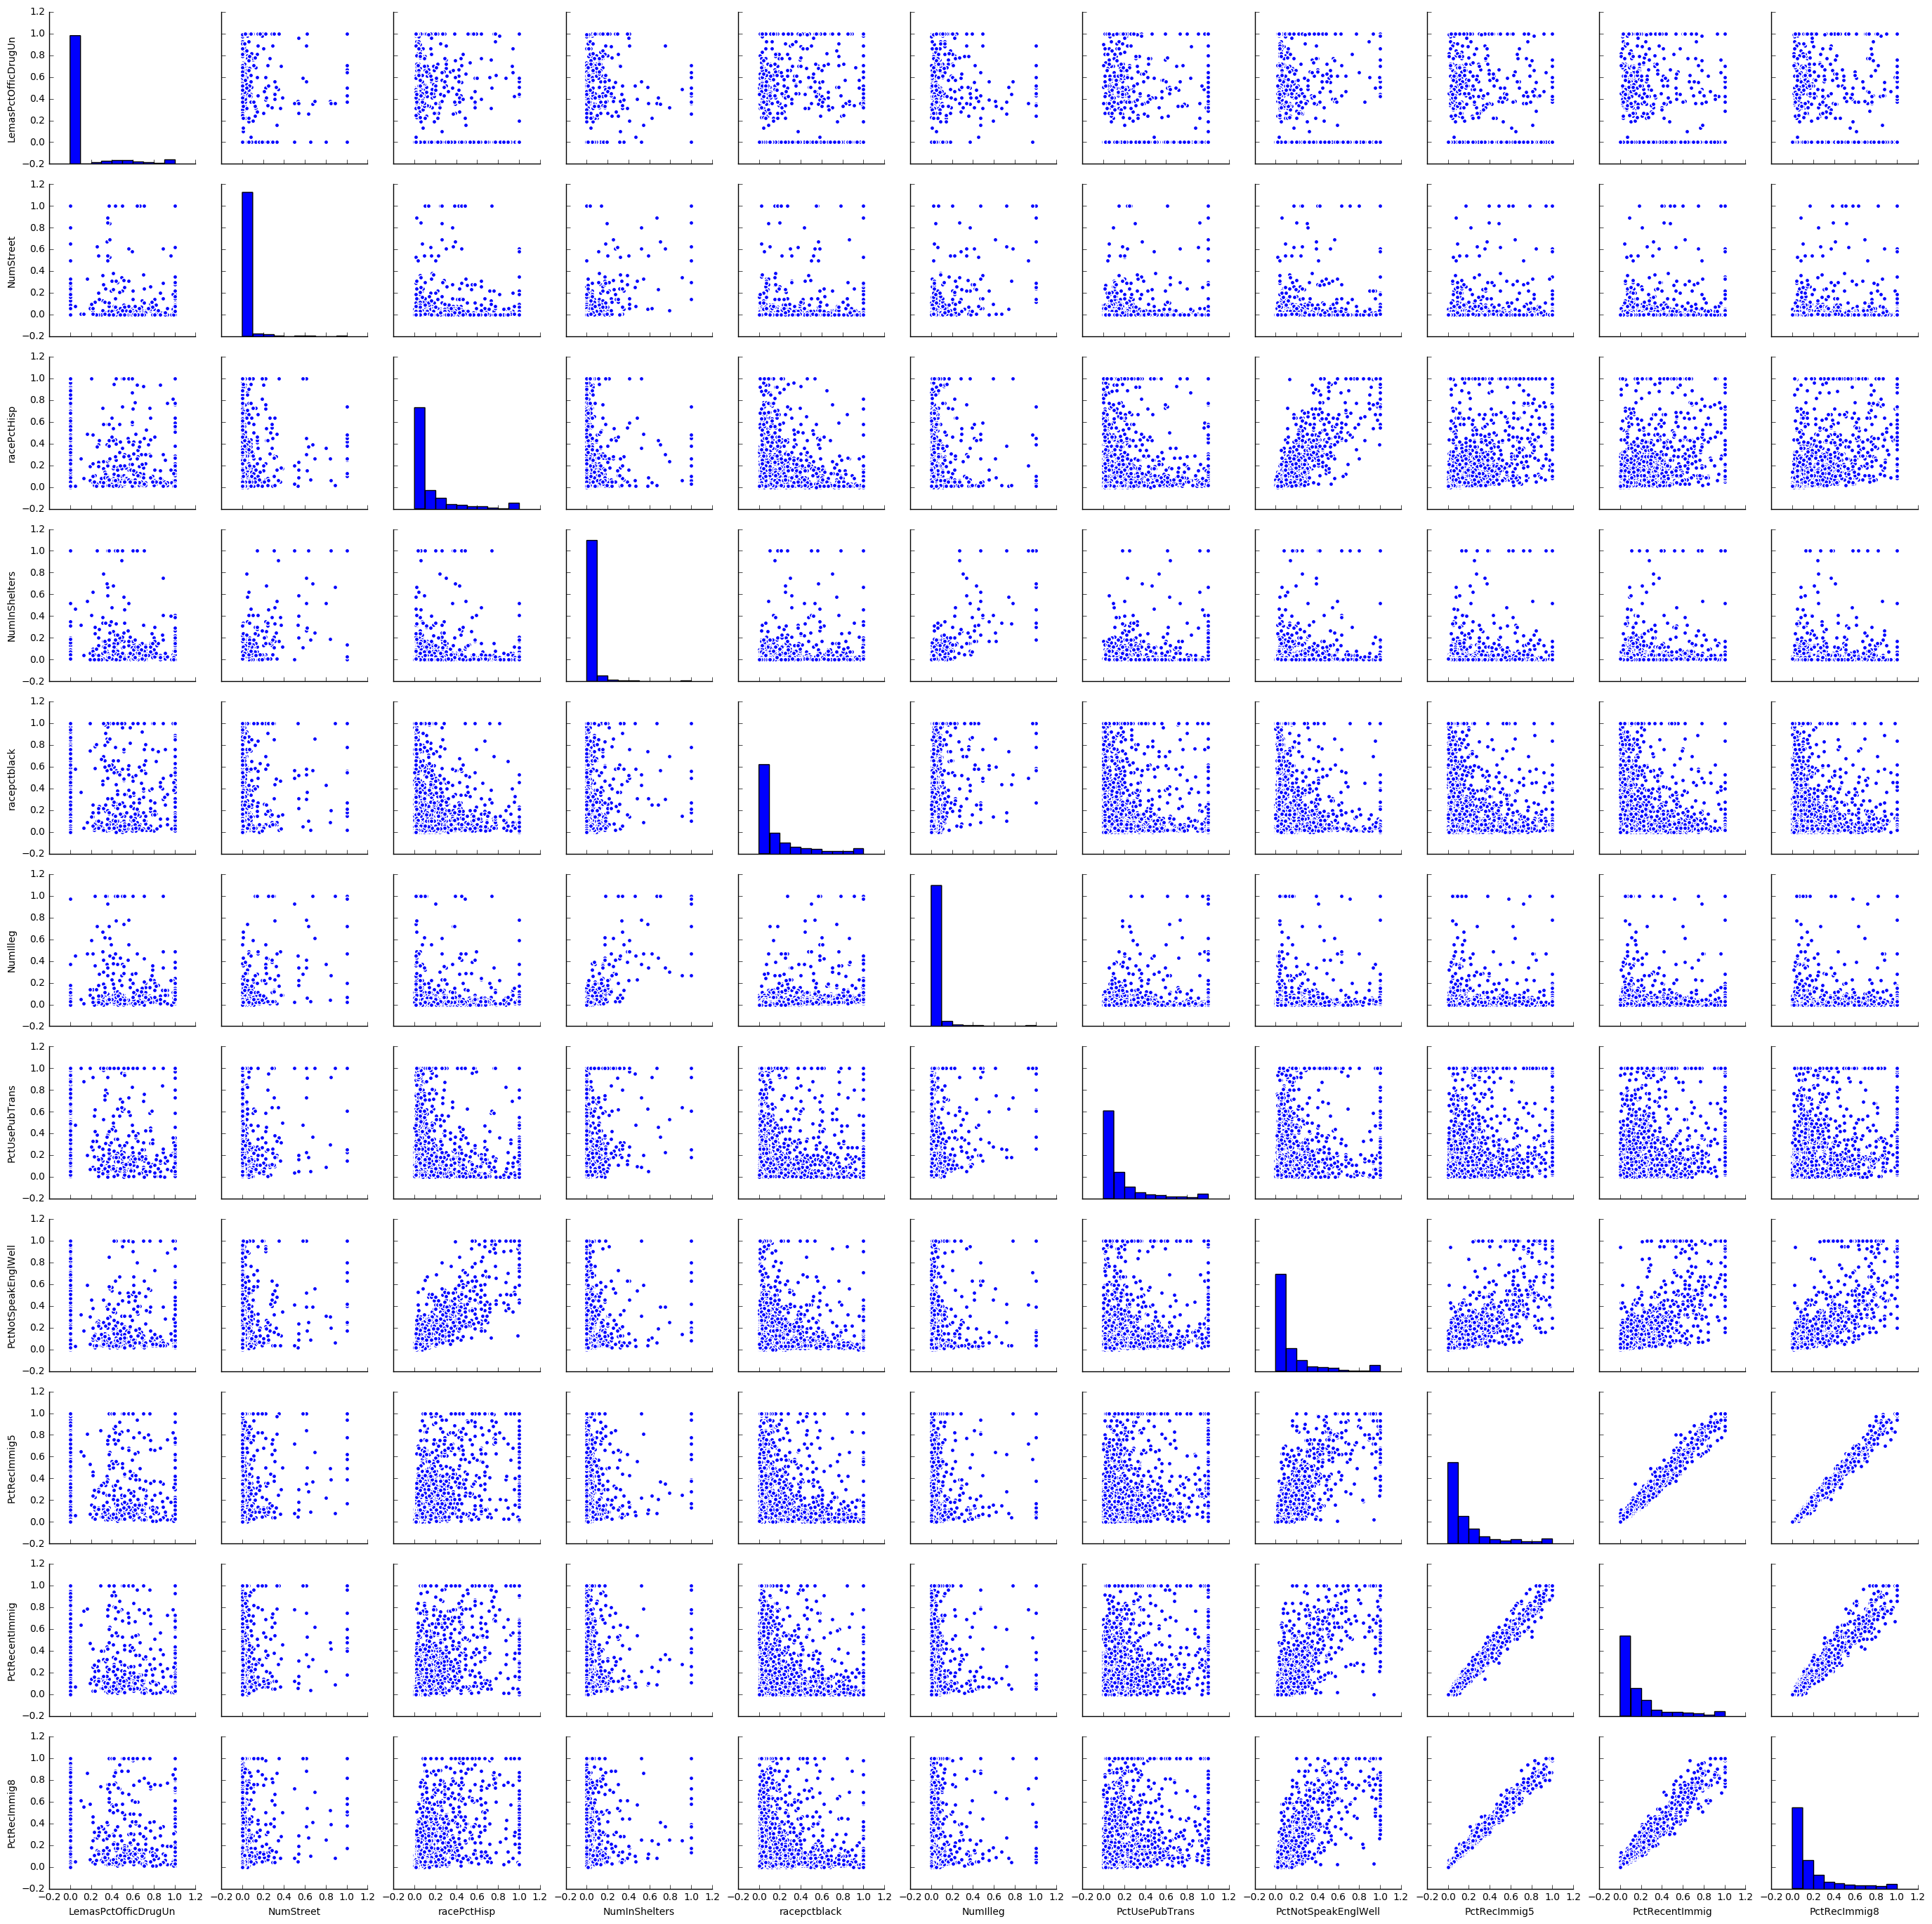

In [57]:
import math
n = math.floor(math.sqrt(128))
indices = CV.argsort()[-n:][::-1]
sns.pairplot(X_imputed[X_imputed.columns[indices]])

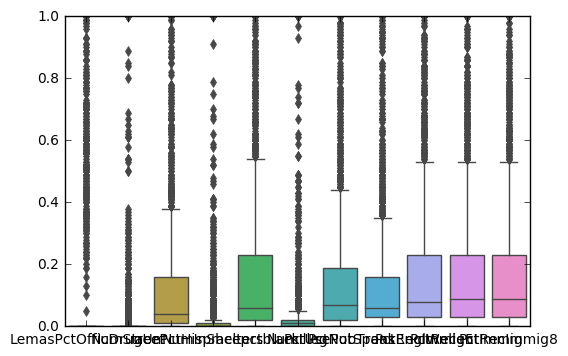

In [58]:
ax = sns.boxplot(data=X_imputed[X_imputed.columns[indices]], orient="v")

### (f)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Test error of linear model: %.4f" % mean_squared_error(y_test, lr.predict(X_test)))

Test error of linear model: 0.7897


### (g)

In [60]:
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)
print("Test error of ridge regression: %.4f" % mean_squared_error(y_test, ridge_reg.predict(X_test)))

Test error of ridge regression: 0.0177


### (h)

In [61]:
from sklearn.linear_model import LassoCV

lasso_reg = LassoCV()
lasso_reg.fit(X_train, y_train)
print("Test error of lasso regression: %.4f" % mean_squared_error(y_test, lasso_reg.predict(X_test)))
print("\nSelected Variables: ")
print(names[5:-1][lasso_reg.coef_!=0])

print("\nNumber of Selected Variables:") 
print(names[5:-1][lasso_reg.coef_!=0].shape[0])

Test error of lasso regression: 0.0176

Selected Variables: 
['racepctblack' 'agePct12t29' 'pctUrban' 'pctWWage' 'pctWFarmSelf'
 'pctWInvInc' 'pctWPubAsst' 'pctWRetire' 'blackPerCap' 'indianPerCap'
 'AsianPerCap' 'OtherPerCap' 'HispPerCap' 'PctPopUnderPov' 'PctEmploy'
 'MalePctDivorce' 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par'
 'PctWorkMom' 'PctIlleg' 'PctImmigRec5' 'PctRecImmig10' 'PctPersOwnOccup'
 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant' 'PctHousOccup'
 'PctVacantBoarded' 'PctVacMore6Mos' 'MedYrHousBuilt' 'PctWOFullPlumb'
 'RentLowQ' 'MedRent' 'MedRentPctHousInc' 'MedOwnCostPctIncNoMtg'
 'NumStreet' 'PctForeignBorn' 'PctSameCity85' 'LemasTotReqPerPop'
 'PolicReqPerOffic' 'PopDens' 'PctUsePubTrans' 'LemasPctPolicOnPatr'
 'LemasGangUnitDeploy' 'LemasPctOfficDrugUn']

Number of Selected Variables:
46


In [62]:
# normalize
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_train_normalized = norm.fit_transform(X_train)
X_test_normalized = norm.transform(X_test)
lasso_reg_norm = LassoCV()
lasso_reg_norm.fit(X_train_normalized, y_train)
print("Test error of lasso regression with normalized features: %.4f" % mean_squared_error(y_test, lasso_reg.predict(X_test_normalized)))
print("\nSelected Variables: ")
print(names[5:-1][lasso_reg_norm.coef_!=0])

print("\nNumber of Selected Variables:") 
print(names[5:-1][lasso_reg_norm.coef_!=0].shape[0])

Test error of lasso regression with normalized features: 0.0441

Selected Variables: 
['racepctblack' 'racePctAsian' 'agePct12t29' 'agePct65up' 'pctUrban'
 'pctWWage' 'pctWFarmSelf' 'pctWInvInc' 'pctWPubAsst' 'pctWRetire'
 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap' 'HispPerCap'
 'PctPopUnderPov' 'PctEmploy' 'MalePctDivorce' 'MalePctNevMarr'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMom' 'PctIlleg'
 'PctImmigRec10' 'PctRecImmig10' 'PctPersDenseHous' 'PctHousLess3BR'
 'HousVacant' 'PctHousOccup' 'PctVacantBoarded' 'PctVacMore6Mos'
 'PctWOFullPlumb' 'RentLowQ' 'MedRent' 'MedRentPctHousInc'
 'MedOwnCostPctIncNoMtg' 'NumInShelters' 'NumStreet' 'PctSameCity85'
 'LemasSwFTFieldPerPop' 'LemasTotReqPerPop' 'PolicReqPerOffic' 'PopDens'
 'PctUsePubTrans' 'LemasPctPolicOnPatr' 'LemasGangUnitDeploy'
 'LemasPctOfficDrugUn']

Number of Selected Variables:
48


***Answer:***

With normalized features, it has a slightly higher test error and the number of selected variables is larger.

### (i)

In [63]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import cross_validation


pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))
n = len(X_reduced)
n = len(X_reduced)
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
regr = LinearRegression()
mse = []
for i in np.arange(1, 20):
    score = -1 * cross_validation.cross_val_score(regr, X_reduced[:,:i], y_train, cv=kf_10, scoring='mean_squared_error').mean()
    mse.append(score)
    
best_m = np.argmin(mse)+1
print("Best M is: " + str(best_m))


X_reduced_test = pca.transform(scale(X_test))[:,:best_m]
regr = LinearRegression()
regr.fit(X_reduced[:,:best_m], y_train)
pca_pred = regr.predict(X_reduced_test)
print("Test error of PCR is: %.4f" % mean_squared_error(y_test, pca_pred))


Best M is: 18
Test error of PCR is: 0.0179


### (j)

In [64]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
clf = GridSearchCV(xgb_model, param_grid=dict(reg_alpha= [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]))
clf.fit(X_train, y_train)
print(clf.best_params_)

{'reg_alpha': 1}


The selected alpha is 1.

In [65]:
best_xgb = clf.best_estimator_
xgb_pred = best_xgb.predict(X_test)
print("Test error of XGBoost is: %.4f" % mean_squared_error(y_test, xgb_pred))

Test error of XGBoost is: 0.0173


## Question 2

### (a)

In [66]:
training_set2 = pd.read_csv("aps_failure_training_set.csv", skiprows=20, na_values=["na"])
test_set2 = pd.read_csv("aps_failure_test_set.csv", skiprows=20, na_values=["na"])

In [67]:
X_train2 = training_set2[training_set2.columns[1:]]
y_train2 = training_set2[training_set2.columns[:1]]
X_test2 = test_set2[test_set2.columns[1:]]
y_test2 = test_set2[test_set2.columns[:1]]

### (b)

***(i)***

Imputation Methods:

1) Mean of the observed values for that variable

2) Substitute with the value from a new individual who was not selected to be in the sample

3) Hot deck: use a randomly chosen value which has similar values on other variables

4) Cold deck: use a systematically chosen value which has similar values on other variables


We pick the first method and use mean value to impute missing values.

In [68]:
# imputation
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_train2_imp = imp.fit_transform(X_train2)
X_train2_imp = pd.DataFrame(X_train2_imp)
X_train2_imp.columns = X_train2.columns

X_test2_imp = imp.fit_transform(X_test2)
X_test2_imp = pd.DataFrame(X_test2_imp)
X_test2_imp.columns = X_test2.columns

*** (ii)***

In [69]:
CV = np.var(X_train2_imp, axis=0)/np.mean(X_train2_imp, axis=0)
print(CV)

aa_000    3.564340e+05
ab_000    3.866449e+00
ac_000    1.676047e+09
ad_000    6.442860e+09
ae_000    3.667400e+03
af_000    3.832018e+03
ag_000    1.870950e+06
ag_001    1.185354e+06
ag_002    2.596281e+06
ag_003    6.476210e+06
ag_004    1.275251e+07
ag_005    9.496242e+06
ag_006    9.115663e+06
ag_007    4.008708e+06
ag_008    1.347326e+06
ag_009    5.564592e+06
ah_000    9.575935e+06
ai_000    2.925566e+06
aj_000    2.194217e+06
ak_000    5.440219e+06
al_000    4.868971e+06
am_0      7.654495e+06
an_000    1.734716e+07
ao_000    1.533703e+07
ap_000    9.397257e+06
aq_000    3.567222e+06
ar_000    5.835795e+01
as_000    9.464375e+05
at_000    2.791327e+06
au_000    1.071227e+06
              ...     
dl_000    3.924997e+07
dm_000    9.071820e+06
dn_000    2.775264e+05
do_000    1.256403e+05
dp_000    2.671538e+04
dq_000    2.002784e+09
dr_000    8.742238e+06
ds_000    4.615140e+05
dt_000    7.080036e+04
du_000    3.147095e+07
dv_000    6.974458e+06
dx_000    2.078945e+07
dy_000    4

*** (iii)***

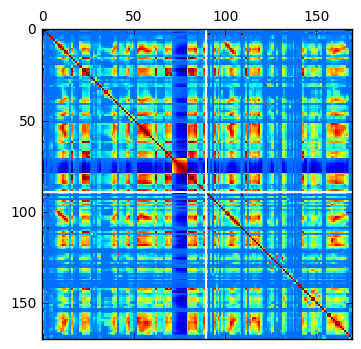

In [70]:
plt.matshow(X_train2_imp.corr())

*** (iv)***

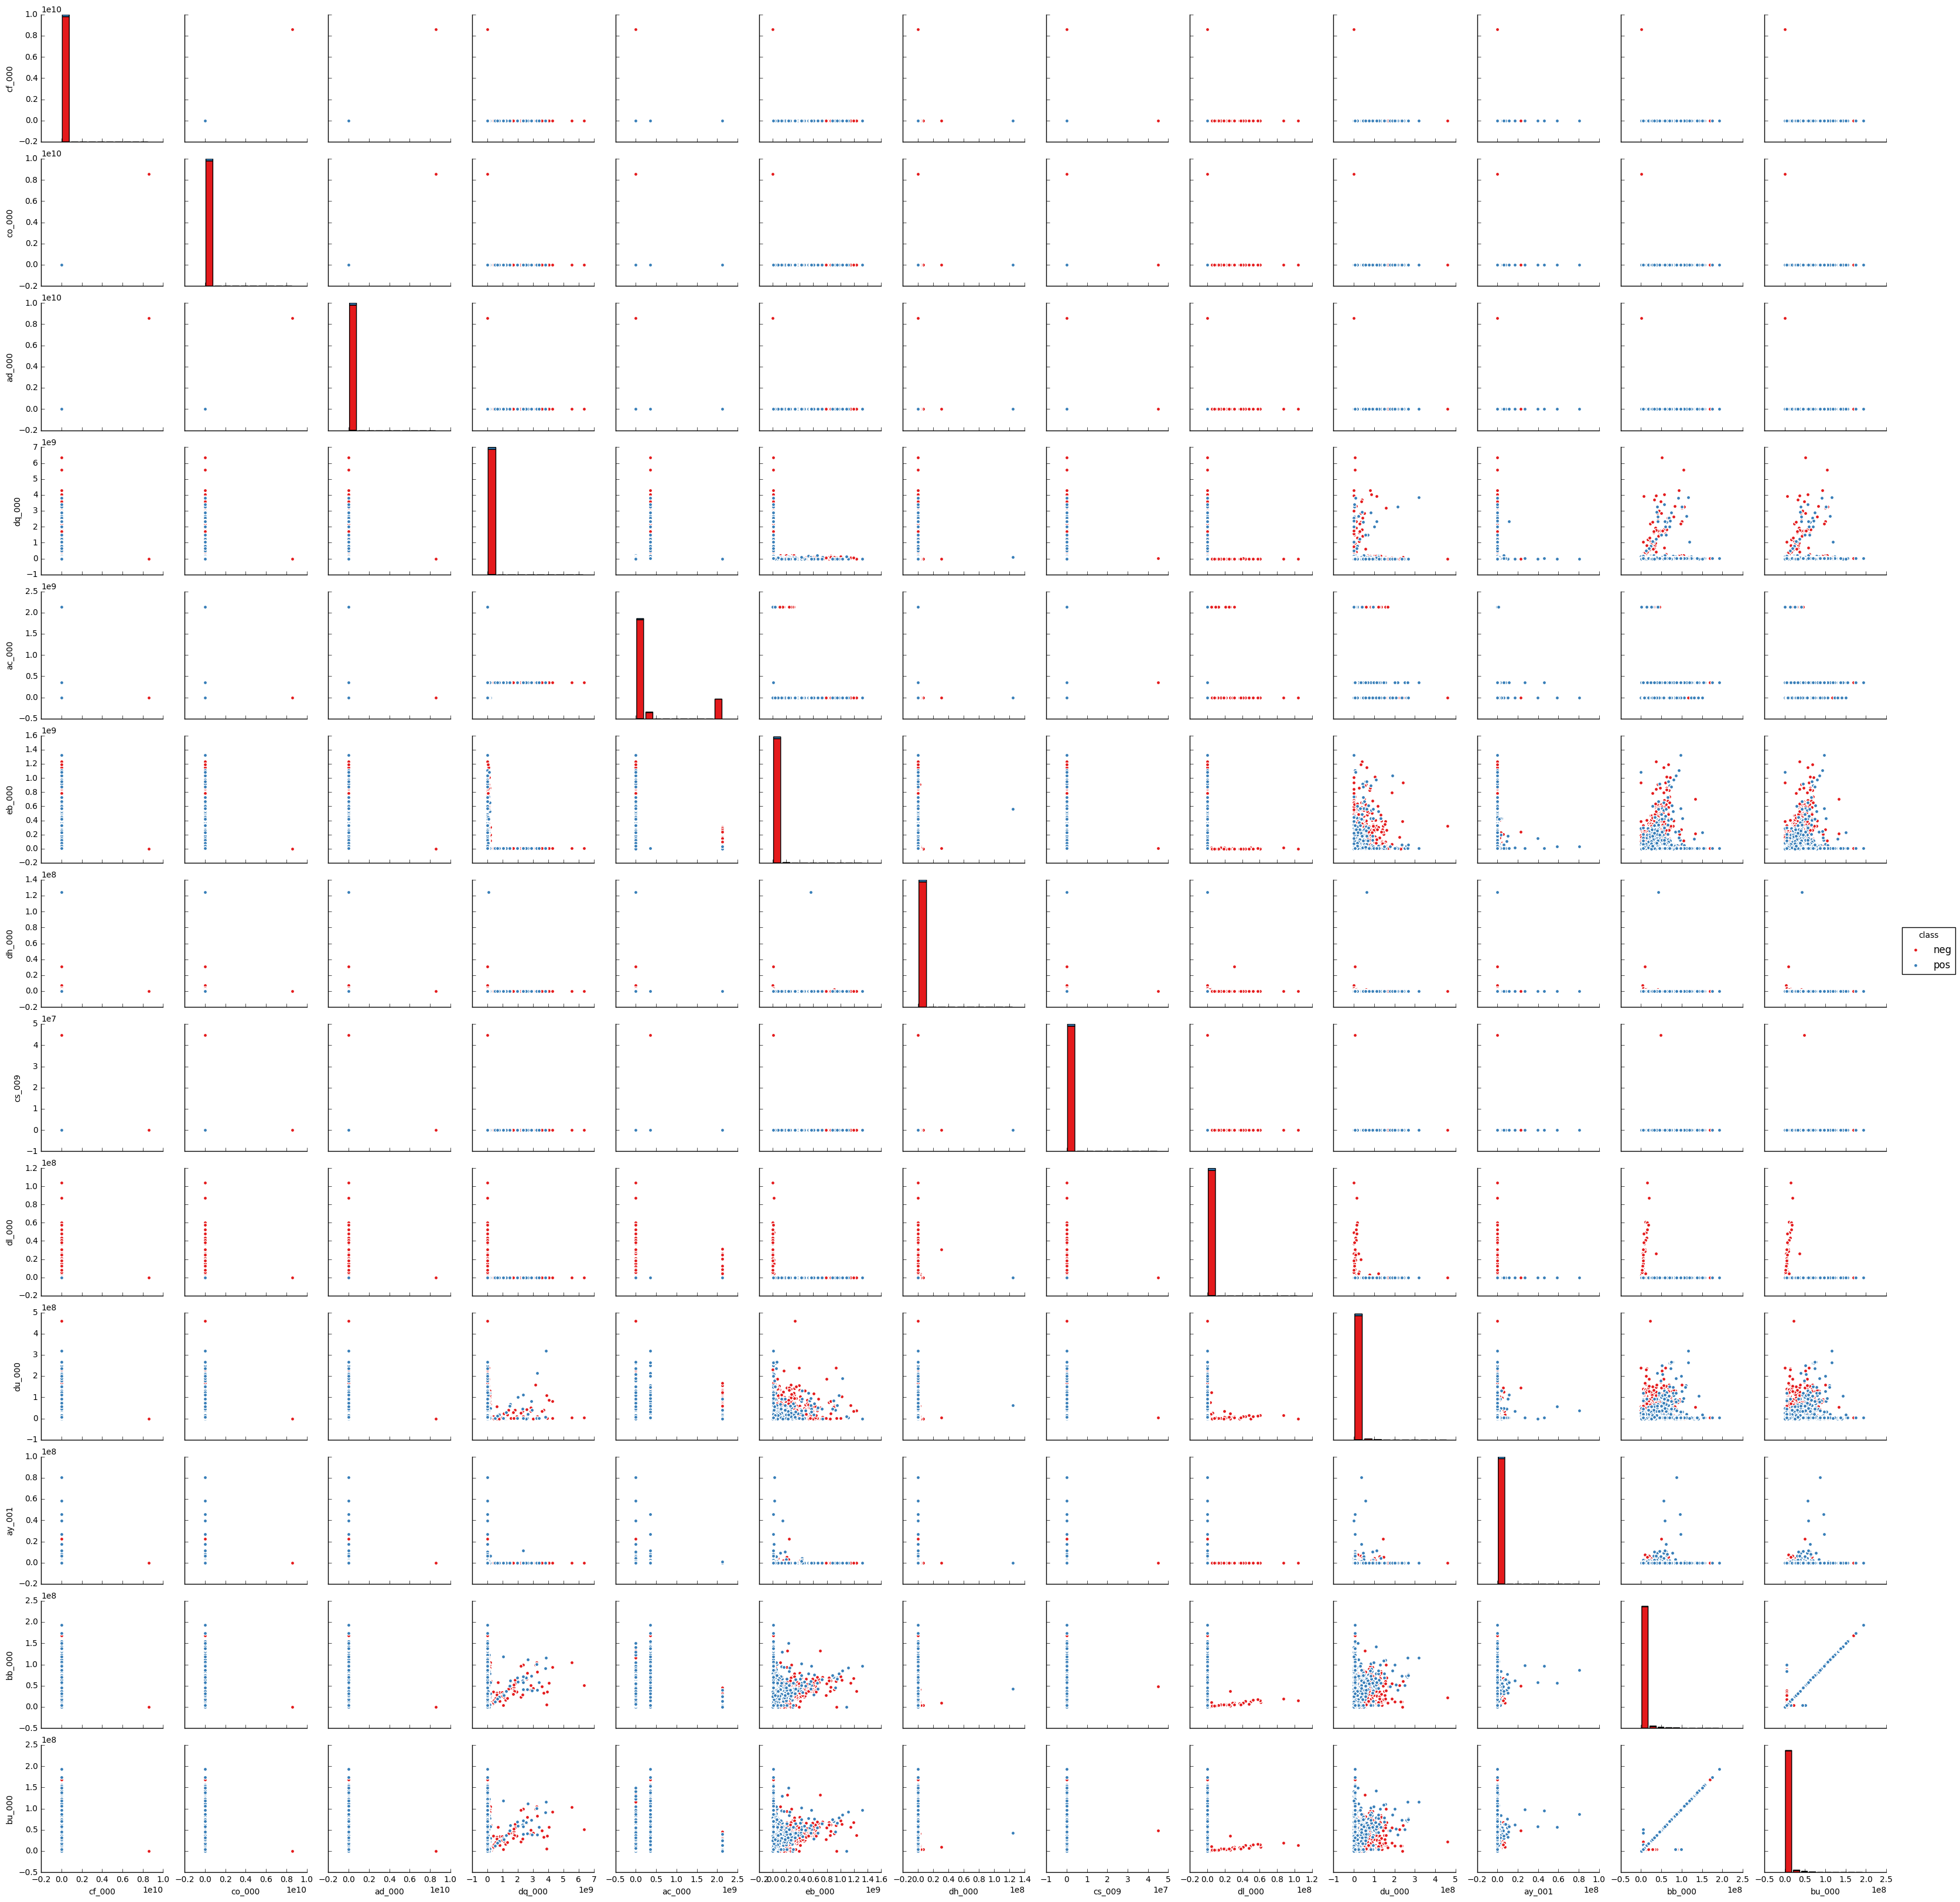

In [71]:
n = math.floor(math.sqrt(170))
indices = CV.argsort()[-n:][::-1]
scatter_data = pd.concat([X_train2_imp[X_train2_imp.columns[indices]], y_train2], axis=1)
sns.pairplot(scatter_data, hue="class", palette='Set1')

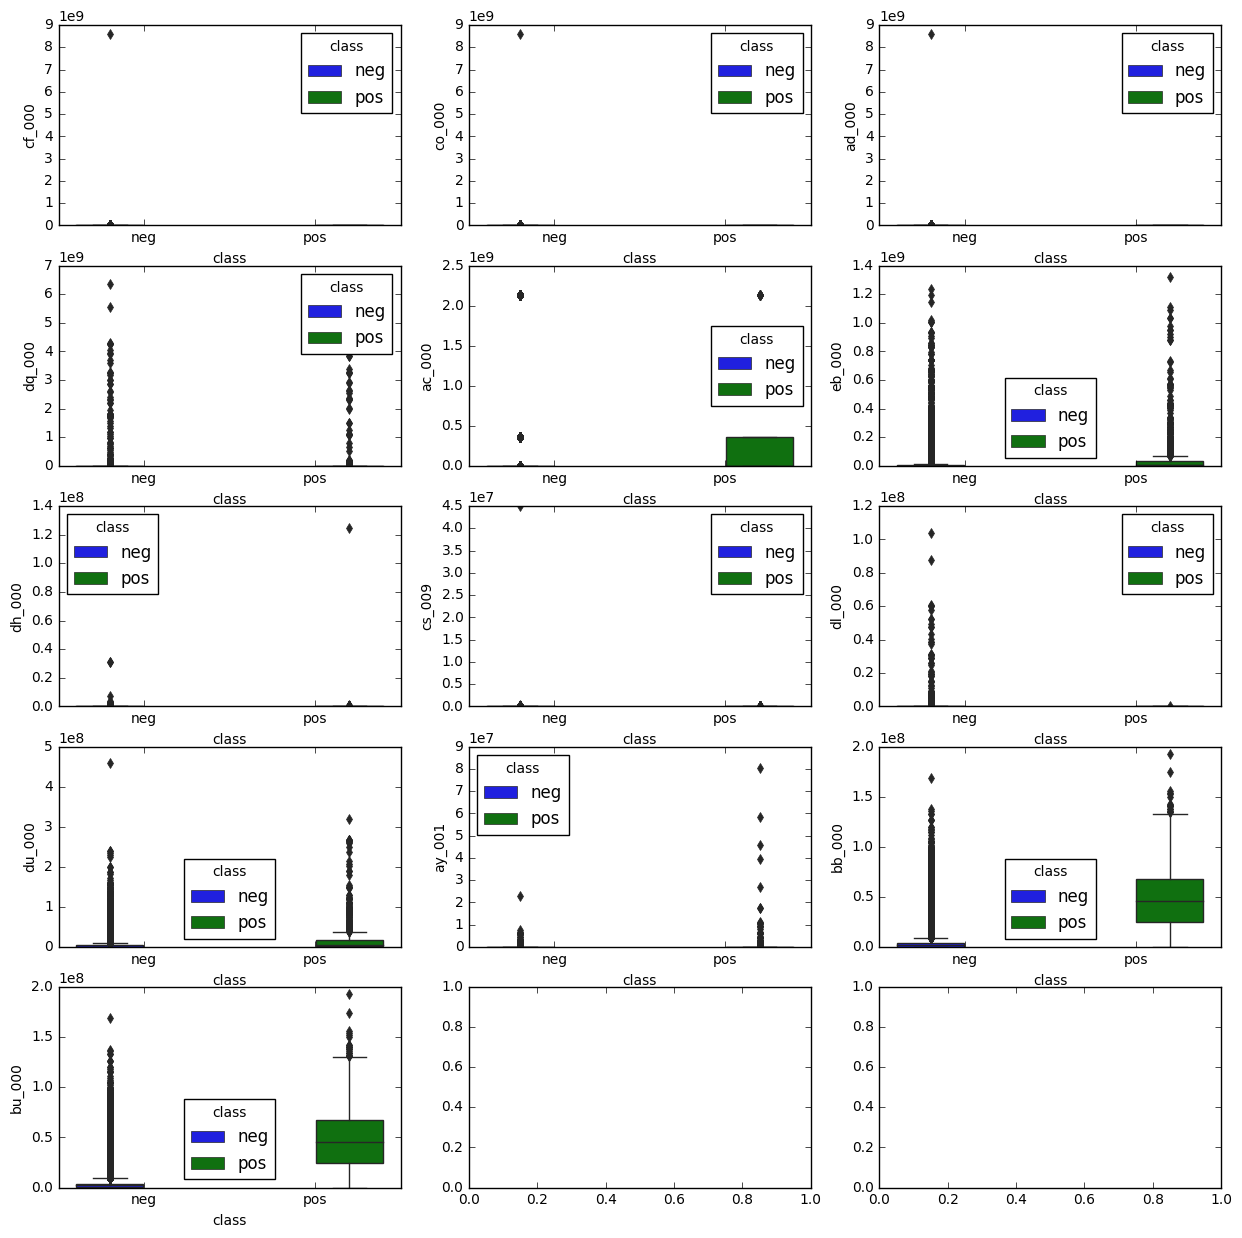

In [72]:
f, axes = plt.subplots(5,3,figsize=(15,15))
selected_names = X_train2_imp.columns[indices]
i = 0
for name in selected_names:
    a = sns.boxplot(x="class", y=name, data=scatter_data, hue="class", ax=axes[i//3, i%3])
    i += 1

The scatter plots only show the relationship between each two features, so we can not draw conclusions about significance.

***(v)***

In [9]:
y_train2['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

Since there are much more negative data than positive data, this dataset is imbalanced.

### (c)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train2_imp, y_train2)
rf_pred = rf.predict(X_test2_imp)
print("confusion matrix: ")
print(confusion_matrix(y_test2, rf_pred))

confusion matrix: 
[[15608    17]
 [  117   258]]


AUC: 
0.977329749333


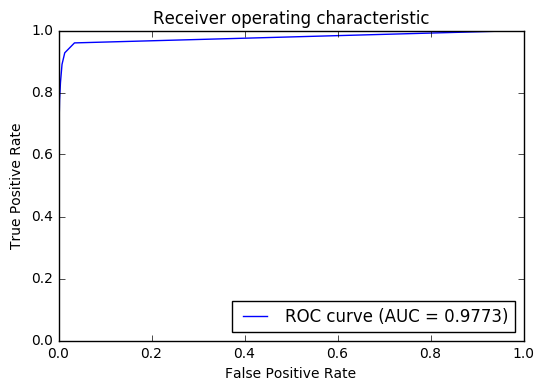

In [11]:
from sklearn import metrics

y_test2_binary = (y_test2['class']=='pos').astype(int)
roc_auc = metrics.roc_auc_score(y_test2_binary, rf.predict_proba(X_test2_imp)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test2_binary, rf.predict_proba(X_test2_imp)[:,1])
print("AUC: ")
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
# misclassification
from sklearn.metrics import accuracy_score

y_test2_pred = rf.predict(X_test2_imp)
y_train2_pred = rf.predict(X_train2_imp)
mis_train = 1 - accuracy_score(y_train2, y_train2_pred)
mis_test = 1 - accuracy_score(y_test2, y_test2_pred)
print("Misclassification rate for training set: %.4f" % mis_train)
print("Misclassification rate for test set: %.4f" % mis_test)


Misclassification rate for training set: 0.0006
Misclassification rate for test set: 0.0084


In [13]:
# Out of bag error
oob_error = 1 - rf.oob_score_
print("Out of Bag error estimate is: %.4f" % oob_error)
print("Comparison: Out of Bag error is slightly lower than the test error.")


Out of Bag error estimate is: 0.0088
Comparison: Out of Bag error is slightly lower than the test error.


### (d)

confusion matrix: 
[[15601    24]
 [  187   188]]
AUC: 
0.955698517333


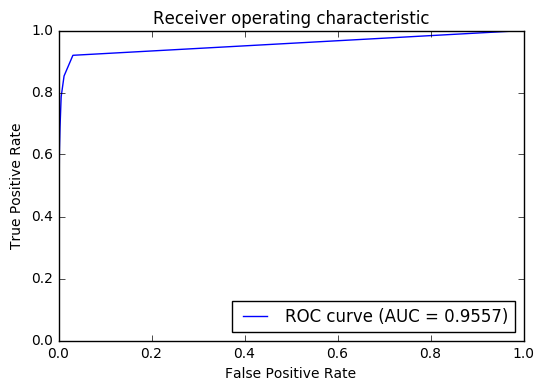

Misclassification rate for training set: 0.0010
Misclassification rate for test set: 0.0132
Out of Bag error estimate is: 0.0100
Comparison: Out of Bag error is slightly lower than the test error.


In [14]:
rf_bal = RandomForestClassifier(oob_score=True, class_weight="balanced")
rf_bal.fit(X_train2_imp, y_train2)
rf_bal_pred = rf_bal.predict(X_test2_imp)
print("confusion matrix: ")
print(confusion_matrix(y_test2, rf_bal_pred))

roc_auc_bal = metrics.roc_auc_score(y_test2_binary, rf_bal.predict_proba(X_test2_imp)[:,1])
fpr_bal, tpr_bal, _ = metrics.roc_curve(y_test2_binary, rf_bal.predict_proba(X_test2_imp)[:,1])
print("AUC: ")
print(roc_auc_bal)
plt.figure()
plt.plot(fpr_bal, tpr_bal, label='ROC curve (AUC = %0.4f)' % roc_auc_bal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

y_test2_pred_bal = rf_bal.predict(X_test2_imp)
y_train2_pred_bal = rf_bal.predict(X_train2_imp)
mis_train_bal = 1 - accuracy_score(y_train2, y_train2_pred_bal)
mis_test_bal = 1 - accuracy_score(y_test2, y_test2_pred_bal)
print("Misclassification rate for training set: %.4f" % mis_train_bal)
print("Misclassification rate for test set: %.4f" % mis_test_bal)

oob_error_bal = 1 - rf_bal.oob_score_
print("Out of Bag error estimate is: %.4f" % oob_error_bal)
print("Comparison: Out of Bag error is slightly lower than the test error.")

***Answer***:

The misclassification rate for test set and out of bag error are higher than part 2c. Because error is penalized for the class imbalance issue, more weight should be given to the minor class.

### (e)

In [15]:
import weka.core.jvm as jvm
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Launching VM in non-python thread
DEBUG:javabridge.jutil:Attaching to VM in monitor thread
DEBUG:javabridge.jutil:Signalling caller


In [16]:
from weka.classifiers import Classifier, PredictionOutput, Evaluation
import arff
from weka.core.converters import Loader, Saver
loader = Loader(classname="weka.core.converters.ArffLoader")
classifier = Classifier(classname="weka.classifiers.trees.LMT")
# y_train2_binary = (y_train2['class']=='pos').astype(int)
# train_data = pd.concat([X_train2_imp, y_train2_binary], axis=1)
# arff.dump('train_data.arff', train_data.values)
data = loader.load_file("train_data.arff")

In [17]:
from weka.core.classes import Random
from weka.filters import Filter

data.class_is_last()
nominal = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
nominal.inputformat(data)
nominal_data = nominal.filter(data)
nominal_data.class_is_last()
evaluation = Evaluation(nominal_data)

In [18]:
evaluation.crossvalidate_model(classifier, nominal_data, 10, Random(42))

For Training Set:
Training Error Rate: 0.008383333333333333
Confusion Matrix:
 [[ 58832.    168.]
 [   335.    665.]]
AUC is : 0.9549963559322034


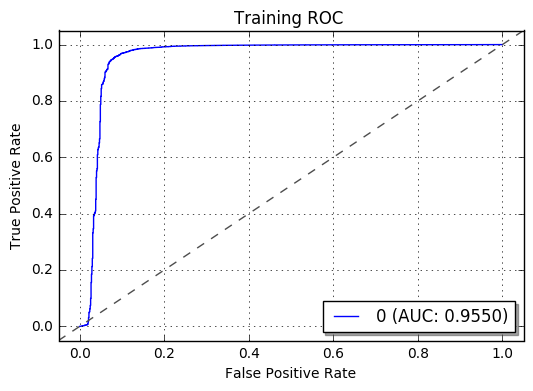

In [33]:
from weka.plot.classifiers import plot_roc
print("For Training Set:")
print("Training Error Rate: " + str(evaluation.error_rate))
print("Confusion Matrix:\n " + str(evaluation.confusion_matrix))
print("AUC is : " + str(evaluation.area_under_roc(1)))
plot_roc(evaluation, title="Training ROC ", class_index=range(0, 1), wait=True)

In [34]:
# test data
test_data = pd.concat([X_test2_imp, y_test2_binary], axis=1)
arff.dump('test_data.arff', test_data.values)
test_data = loader.load_file("test_data.arff")
test_data.class_is_last()
test_nominal = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
test_nominal.inputformat(test_data)
test_nominal_data = nominal.filter(test_data)
test_nominal_data.class_is_last()

In [37]:
cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(nominal_data)
evaluation.test_model(cls, test_data)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

For Test Set:
Test Error Rate: 0.008671052631578947
Confusion Matrix:
 [[ 74416.    209.]
 [   450.    925.]]
AUC is : 0.9592937877265113


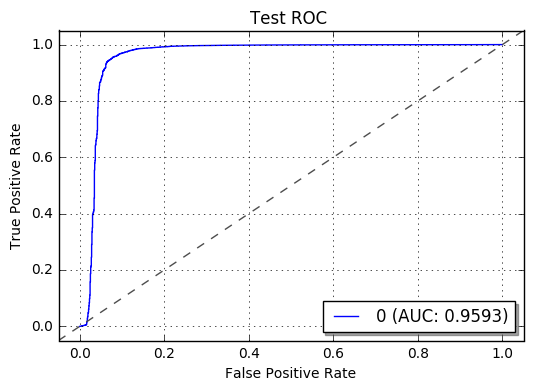

In [39]:
print("For Test Set:")
print("Test Error Rate: " + str(evaluation.error_rate))
print("Confusion Matrix:\n " + str(evaluation.confusion_matrix))
print("AUC is : " + str(evaluation.area_under_roc(1)))
plot_roc(evaluation, title="Test ROC ", class_index=range(0, 1), wait=True)

### (f)

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

y_train2_binary = (y_train2['class']=='pos').astype(int)
X_train_smote, y_train_smote = smote.fit_sample(X_train2_imp, y_train2_binary)
X_train_smote, y_train_smote = pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)

loader_f = Loader(classname="weka.core.converters.ArffLoader")
classifier_f = Classifier(classname="weka.classifiers.trees.LMT")

train_data_smote = pd.concat([X_train_smote, y_train_smote], axis=1)
arff.dump('train_data_smote.arff', train_data_smote.values)
data_smote = loader_f.load_file("train_data_smote.arff")

In [43]:
data_smote.class_is_last()
nominal_smote = Filter(classname="weka.filters.unsupervised.attribute.NumericToNominal", options=["-R", "last"])
nominal_smote.inputformat(data_smote)
nominal_data_smote = nominal.filter(data_smote)
nominal_data_smote.class_is_last()
evaluation_smote = Evaluation(nominal_data_smote)

In [44]:
evaluation_smote.crossvalidate_model(classifier_f, nominal_data_smote, 10, Random(42))

For Training Set:
Training Error Rate: 0.014584745762711864
Confusion Matrix:
 [[ 58134.    866.]
 [   855.  58145.]]
AUC is : 0.9959809399597817


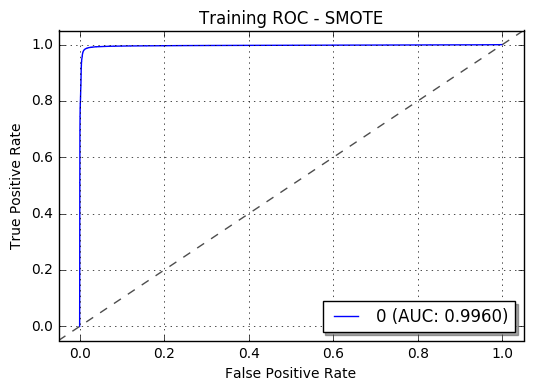

In [45]:
print("For Training Set:")
print("Training Error Rate: " + str(evaluation_smote.error_rate))
print("Confusion Matrix:\n " + str(evaluation_smote.confusion_matrix))
print("AUC is : " + str(evaluation_smote.area_under_roc(1)))
plot_roc(evaluation_smote, title="Training ROC - SMOTE", class_index=range(0, 1), wait=True)

In [46]:
# test data
cls_smote = Classifier(classname="weka.classifiers.trees.LMT")
cls_smote.build_classifier(nominal_data_smote)
evl_smote = Evaluation(nominal_data_smote)
evl_smote.test_model(cls, test_data)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

For Test Set:
Test Error Rate: 0.00975
Confusion Matrix:
 [[ 15584.     41.]
 [   115.    260.]]
AUC is : 0.970497536


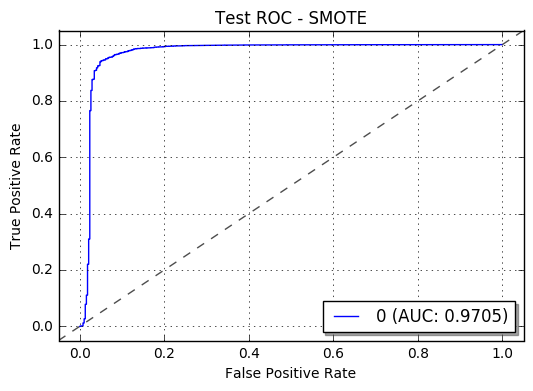

In [47]:
print("For Test Set:")
print("Test Error Rate: " + str(evl_smote.error_rate))
print("Confusion Matrix:\n " + str(evl_smote.confusion_matrix))
print("AUC is : " + str(evl_smote.area_under_roc(1)))
plot_roc(evl_smote, title="Test ROC - SMOTE", class_index=range(0, 1), wait=True)

***Comparison:*** SMOTE has slightly higher training error and test error, but higher AUCs for both training and test sets.

## Question 3 (ISLR 6.8.3)

### (a)

(iv) steadily decrease.

As s increases, the solution set to $\{\beta: \sum|\beta_j|\leq s\}$ is larger. Since the model is more flexible, the training RSS steadily decreases.

### (b)
(ii) Decrease initially, and then eventually start increasing in a U shape.

As the flexibility of the model increases, the test RSS first decreases and the increases because of variance-bias tradeoff.

### (c)

(iii) steadily increase.

As s increases, the model is more flexible, and hence the variance increases.

### (d)

(iv) steadily decrease.

As s increases, the model is more flexible, and hence the bia is smaller.

### (e)

(v) remain constant.

Irreducible error does not depend on the model, so it remains constant.

## Question 4 (ISLR 6.8.5)

### (a)

Ridge regression minimizes $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda ({\hat\beta_1}^2 + {\hat\beta_2}^2)$

### (b)

We know $x_{11} = x_{12} = x_1$ and $x_{21} = x_{22} = x_2$.

Take derivatives of the optimization equation with respect to $\hat\beta_1$ and $\hat\beta_2$:

$$\hat\beta_1 = \frac{x_1y_1 + x_2y_2 - \hat{\beta}_2(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}$$

$$\hat\beta_2 = \frac{x_1y_1 + x_2y_2 - \hat{\beta}_1(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}$$

We then substitute $\hat\beta_2$ to the first equation:
$$({\lambda + x_1^2 + x_2^2})\hat\beta_1 = x_1y_1 + x_2y_2 - \frac{x_1y_1 + x_2y_2 - \hat{\beta}_1(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}(x_1^2 + x_2^2)$$

If we substitute $\hat\beta_1$ to the second equation:

$$({\lambda + x_1^2 + x_2^2})\hat\beta_2 = x_1y_1 + x_2y_2 - \frac{x_1y_1 + x_2y_2 - \hat{\beta}_2(x_1^2 + x_2^2)}{\lambda + x_1^2 + x_2^2}(x_1^2 + x_2^2)$$

The solutions to both equations are the same. Hence, $\hat\beta_1 = \hat\beta_2$

### (c)

Lasso regression minimizes $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (|{\hat\beta_1}| + |{\hat\beta_2}|)$

### (d)

Take derivatives of the optimization equation with respect to $\hat\beta_1$ and $\hat\beta_2$:

$$-x_1y_1 - x_2y_2 + \hat{\beta}_1(x_1^2 + x_2^2) + \hat{\beta}_2(x_1^2 + x_2^2) + \lambda \frac{|\hat\beta_1|}{\hat\beta_1} = 0$$

$$-x_1y_1 - x_2y_2 + \hat{\beta}_1(x_1^2 + x_2^2) + \hat{\beta}_2(x_1^2 + x_2^2) + \lambda \frac{|\hat\beta_2|}{\hat\beta_2} = 0$$
 

So

$$\lambda\frac{|\beta_1|}{\beta_1} = \lambda\frac{|\beta_2|}{\beta_2}$$

Hence, the solutions requires that $\beta_1$ and $\beta_2$ are both positive or both negative.

## Question 5 (ISLR 8.4.5)

***Majority Vote:***

There are 6 probability estimates that are greater than 0.5 and 4 estimates less than 0.5. So the number of red is larger than the number of green.

Hence, the prediction is red.

***Average Probability:***

In [76]:
np.mean(np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]))

0.45000000000000001

The average probability of red is less than 0.5. Hence, the prediction is green.

## Question 6 (ISLR 9.7.3)

### (a)

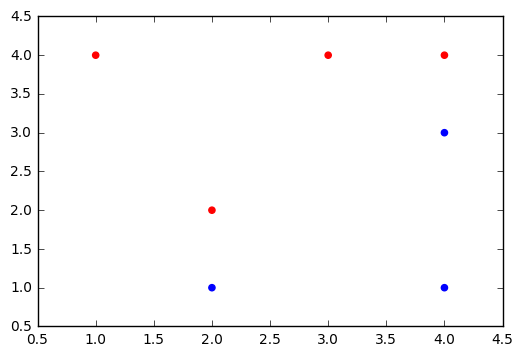

In [77]:
x1 = np.array([3, 2, 4, 1, 2, 4, 4])
x2 = np.array([4, 2, 4, 4, 1, 3, 1])
colors = np.array(["red", "red", "red", "red", "blue", "blue", "blue"])
plt.scatter(x1, x2, color=colors)

### (b)
The optimal separating hyperplane is between points (2, 2), (2, 1), (4, 4) and (4, 3).

So the hyperplane must pass point (2, 1.5) and (4, 3.5).

Hence, the equation for this hyperplane is $$0.5 - X_1 + X_2 = 0$$

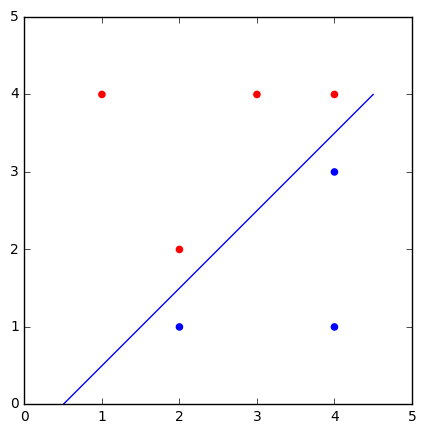

In [95]:
x = np.arange(0.5, 5, 0.5)
abline_values = [1 * i - 0.5 for i in x]
plt.figure(figsize=(5,5))
plt.scatter(x1, x2, color=colors)
plt.plot(x, abline_values, '-')
plt.ylim(0, 5)
plt.show()

### (c)

Classify to Red if $0.5-X_1+X_2 > 0 $, and classify to Blue otherwise.

$\beta_0=0.5, \beta_1=-1, \beta_2=1$

### (d)

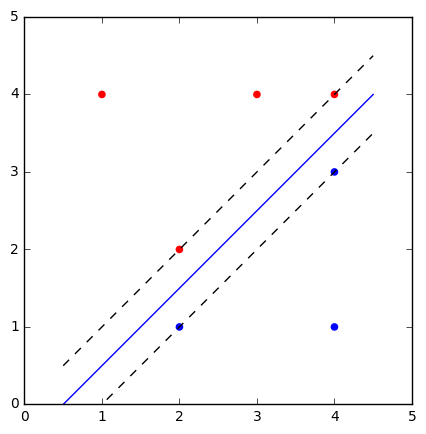

In [98]:
abline_values = [1 * i - 0.5 for i in x]
abline_values_upper = [1 * i for i in x]
abline_values_lower = [1 * i - 1 for i in x]
plt.figure(figsize=(5,5))
plt.scatter(x1, x2, color=colors)
plt.plot(x, abline_values, '-')
plt.ylim(0, 5)
plt.plot(x, abline_values_upper, '--', color='black')
plt.plot(x, abline_values_lower, '--', color='black')
plt.show()

### (e)

The four points with arrow pointing to the hyperplane are support vectors.

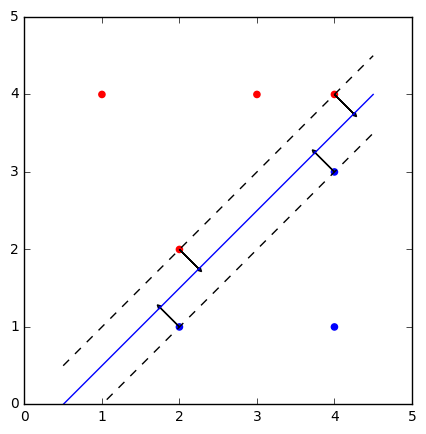

In [103]:
plt.figure(figsize=(5,5))
plt.scatter(x1, x2, color=colors)
plt.plot(x, abline_values, '-')
plt.ylim(0, 5)
plt.plot(x, abline_values_upper, '--', color='black')
plt.plot(x, abline_values_lower, '--', color='black')
ax = plt.axes()
ax.arrow(2, 2, 0.25, -0.25, head_length=0.05, head_width=0.05)
ax.arrow(4, 4, 0.25, -0.25, head_length=0.05, head_width=0.05)
ax.arrow(2, 1, -0.25, +0.25, head_length=0.05, head_width=0.05)
ax.arrow(4, 3, -0.25, +0.25, head_length=0.05, head_width=0.05)
plt.show()

### (f)

Since the 7th obervation is (4,1), it is outside the margin. Hence, a slight movement of it would not change the maximal margin hyperplane. 

### (g)

The equation for this hyperplane is  $0.7-X_1+X_2 =0$.

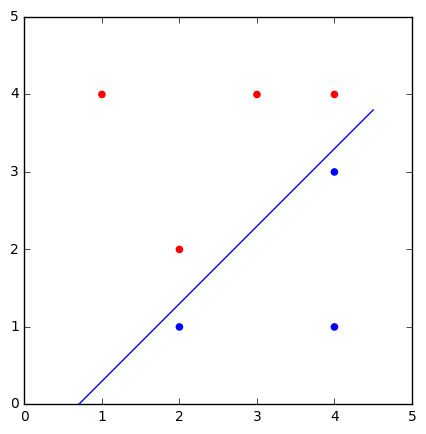

In [106]:
abline_values_g = [1 * i - 0.7 for i in x]
plt.figure(figsize=(5,5))
plt.scatter(x1, x2, color=colors)
plt.plot(x, abline_values_g, '-')
plt.ylim(0, 5)
plt.show()

### (h)

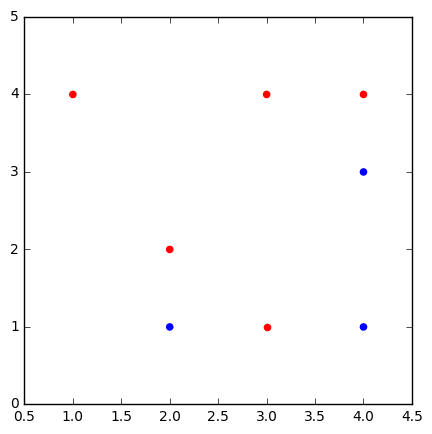

In [108]:
plt.figure(figsize=(5,5))
plt.scatter(x1, x2, color=colors)
plt.scatter([3], [1], color=['red'])
plt.ylim(0, 5)
plt.show()